# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
import requests

city = "London"
weather_api_key = "1b784d3cea7f3ccca2f688e13bf3c6fd"
url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    "q": city,
    "appid": weather_api_key,
    "units": "metric"
}
response = requests.get(url, params=params)
print(response.status_code)
print(response.json())



200
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.26, 'feels_like': 5.65, 'temp_min': 8.36, 'temp_max': 9.86, 'pressure': 1009, 'humidity': 74, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 280}, 'clouds': {'all': 100}, 'dt': 1733448912, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1733471459, 'sunset': 1733500362}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [33]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | chelno-vershiny
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | namibe
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | pa daet
Processing Record 9 of Set 1 | nogliki
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | amble
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | lib
Processing Record 16 of Set 1 | boise
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | grootfontein
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | grytviken


In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,27.40,72,100,9.53,CC,1733449371
1,chelno-vershiny,54.4333,51.1000,-6.28,86,6,2.26,RU,1733449373
2,adamstown,-25.0660,-130.1015,23.32,78,100,7.10,PN,1733449374
3,namibe,-15.1961,12.1522,22.40,85,100,1.54,AO,1733449375
4,papatowai,-46.5619,169.4708,15.54,79,100,6.34,NZ,1733449376


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.40,72,100,9.53,CC,1733449371
1,chelno-vershiny,54.4333,51.1000,-6.28,86,6,2.26,RU,1733449373
2,adamstown,-25.0660,-130.1015,23.32,78,100,7.10,PN,1733449374
3,namibe,-15.1961,12.1522,22.40,85,100,1.54,AO,1733449375
4,papatowai,-46.5619,169.4708,15.54,79,100,6.34,NZ,1733449376


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

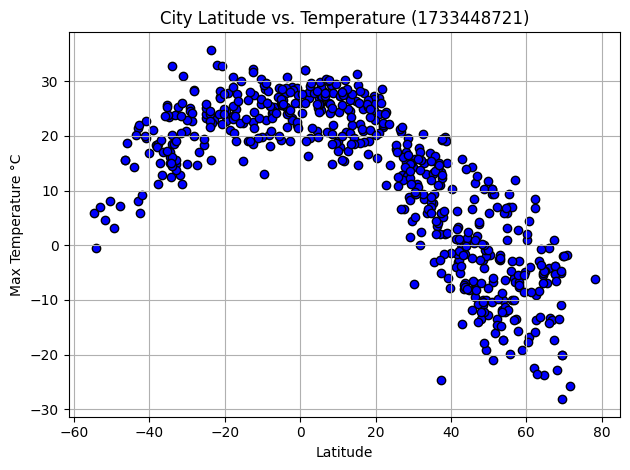

In [38]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

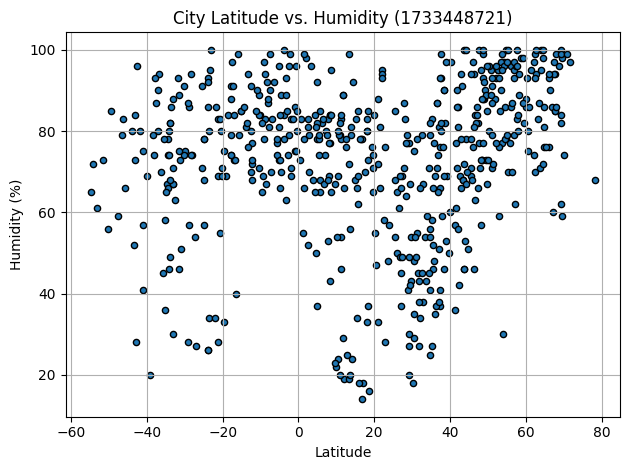

In [39]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

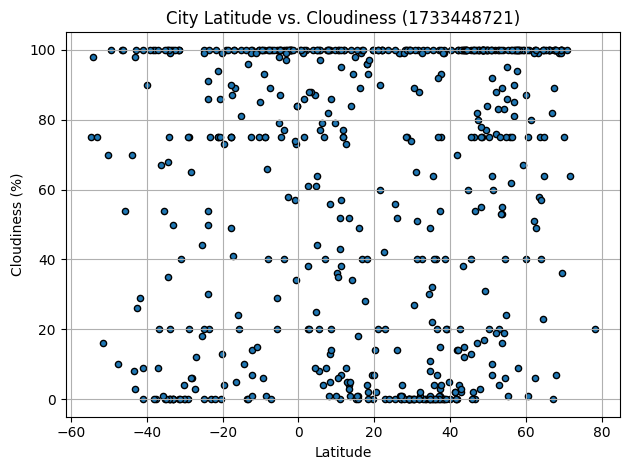

In [40]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

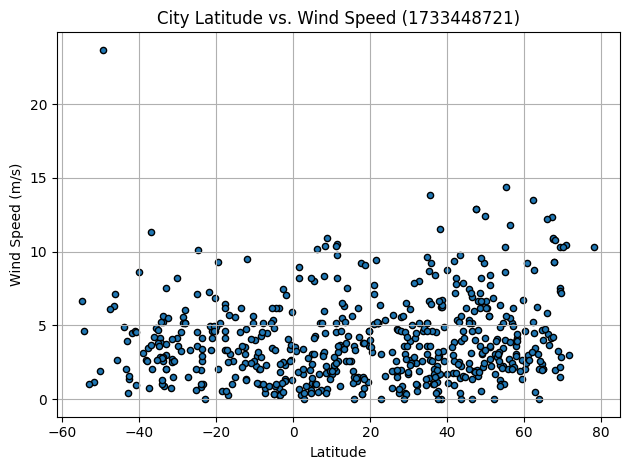

In [41]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chelno-vershiny,54.4333,51.1000,-6.28,86,6,2.26,RU,1733449373
6,qaqortoq,60.7167,-46.0333,-16.75,80,1,2.73,GL,1733449379
7,pa daet,19.5049,99.9924,24.71,76,7,1.16,TH,1733449380
8,nogliki,51.8333,143.1667,-16.09,88,100,6.87,RU,1733449381
10,longyearbyen,78.2186,15.6401,-6.09,68,20,10.29,SJ,1733449384


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude <= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.40,72,100,9.53,CC,1733449371
2,adamstown,-25.0660,-130.1015,23.32,78,100,7.10,PN,1733449374
3,namibe,-15.1961,12.1522,22.40,85,100,1.54,AO,1733449375
4,papatowai,-46.5619,169.4708,15.54,79,100,6.34,NZ,1733449376
5,port-aux-francais,-49.3500,70.2167,3.18,85,100,23.68,TF,1733449378


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8605502612370303


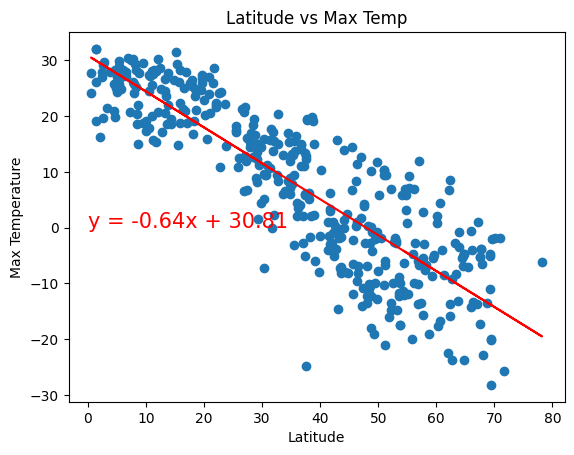

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Latitude vs Max Temp" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.6178497933417837


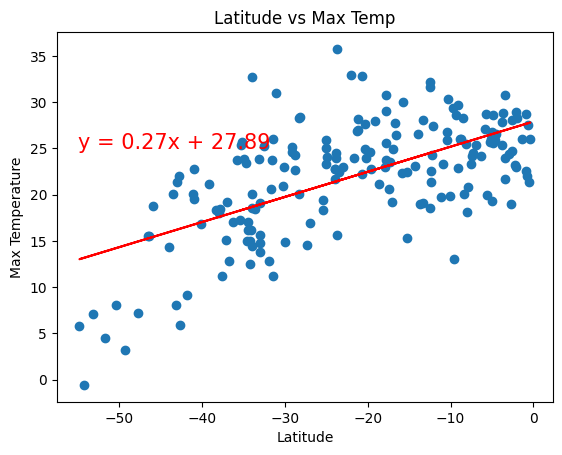

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title("Latitude vs Max Temp" )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.3695146419799326


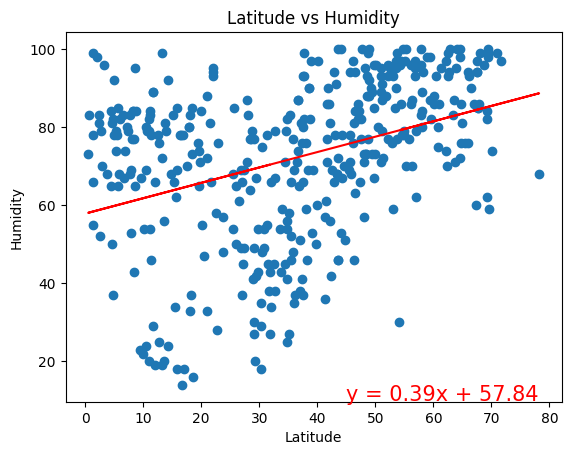

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Latitude vs Humidity" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.31427103434371517


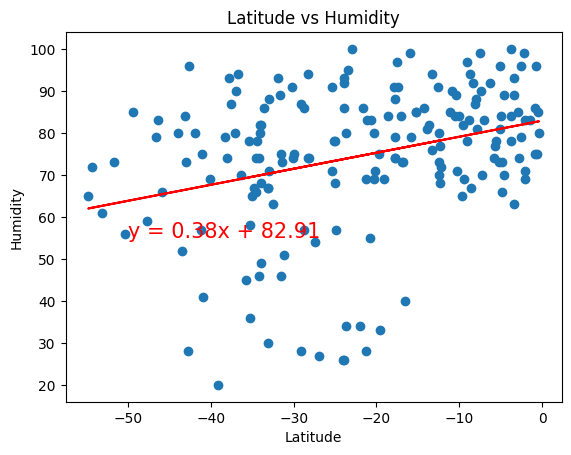

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Latitude vs Humidity" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.0790414682897516


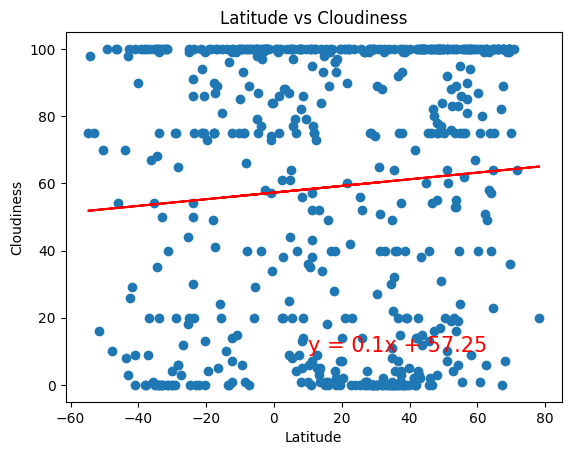

In [50]:
# Northern Hemisphere
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.2502205692369856


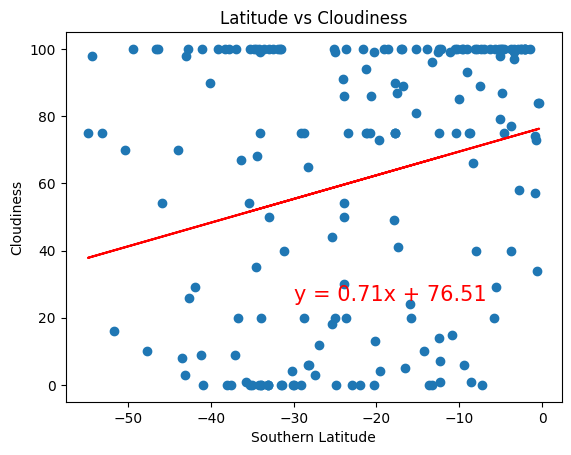

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness" )
plt.xlabel("Southern Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.1963204024324883


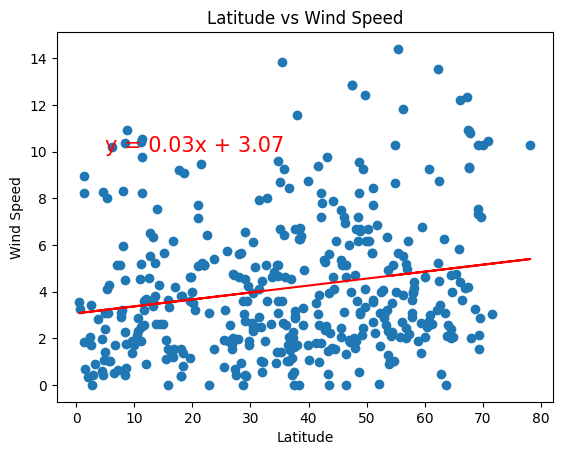

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.18481376589775972


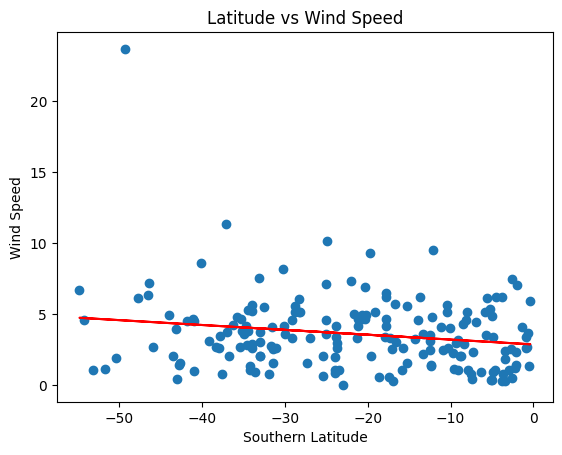

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed" )
plt.xlabel("Southern Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** the r-value of -0.18 suggests that there is a minimal negative correlation between latitude and wind speed in the southern hemisphere